In [17]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.weightstats import ztest as ztest
pd.set_option('display.max_columns', None)

In [18]:
df = pd.read_csv('../data/2001-2019-State-Data-Method.csv')

In [19]:
df.head(665)

,Year,Geographic\nRegion,State of Death,Group Method,Method,Suicides,Group\nPercentage
0,2001,Northeast,All,Veteran Method,Firearms,430,56.4
1,2001,Northeast,Connecticut,Veteran Method,Firearms,27,60.0
2,2001,Northeast,Maine,Veteran Method,Firearms,21,55.3
3,2001,Northeast,Massachusetts,Veteran Method,Firearms,39,47.6
4,2001,Northeast,New Jersey,Veteran Method,Firearms,41,44.1
...,...,...,...,...,...,...,...
660,2007,Midwest,Missouri,General Population Method,Firearms,442,56.2
661,2007,Midwest,Nebraska,General Population Method,Firearms,84,49.7
662,2007,Midwest,North Dakota,General Population Method,Firearms,48,52.2
663,2007,Midwest,Ohio,General Population Method,Firearms,643,51.2


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               1893 non-null   int64  
 1   Geographic
Region  1893 non-null   object 
 2   State of Death     1893 non-null   object 
 3   Group Method       1893 non-null   object 
 4   Method             1893 non-null   object 
 5   Suicides           1893 non-null   int64  
 6   Group
Percentage   1893 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 103.6+ KB


In [21]:
df_method = df[['Year','State of Death', 'Group Method', 'Method', 'Suicides']]

In [22]:
df_method.head()

,Year,State of Death,Group Method,Method,Suicides
0,2001,All,Veteran Method,Firearms,430
1,2001,Connecticut,Veteran Method,Firearms,27
2,2001,Maine,Veteran Method,Firearms,21
3,2001,Massachusetts,Veteran Method,Firearms,39
4,2001,New Jersey,Veteran Method,Firearms,41


In [23]:
df_2019 = df_method[df_method['Year'] == 2019]

In [24]:
df_2019 = df_2019[df_2019['State of Death'] == 'All']

In [25]:
#df_2019 = df_2019[df_2019['Method'] == 'Firearms']

In [26]:
df_2019.head(10)

,Year,State of Death,Group Method,Method,Suicides
1792,2019,All,Veteran Method,Firearms,406
1799,2019,All,Veteran Method,Firearms,902
1810,2019,All,Veteran Method,Firearms,1939
1826,2019,All,Veteran Method,Firearms,1087
1838,2019,All,General Population Method,Firearms,2174
1848,2019,All,General Population Method,Firearms,4990
1861,2019,All,General Population Method,Firearms,10484
1879,2019,All,General Population Method,Firearms,5635


In [27]:
df_2019.groupby('Group Method').sum()

,Year,Suicides
Group Method,,
General Population Method,8076,23283
Veteran Method,8076,4334


## Hypothesis Test 3
### H0: Veteran Firearm suicide rate <= General Population Firearm suicide rate
### Ha: Veteran Firearm suicide rate > General Population Firearm suicide rate

Testing with 2019 data

In [39]:
shared_sample_freq = (4334 + 23283) / (6261+45861)
shared_sample_variance = (6261+45861) * (shared_sample_freq * (1 - shared_sample_freq)) / (6261*45861)

difference_in_proportions = stats.norm(0, np.sqrt(shared_sample_variance))

Text(0.5, 1.0, 'Distribution of Difference in Sample Frequencies Assuming $H_0$')

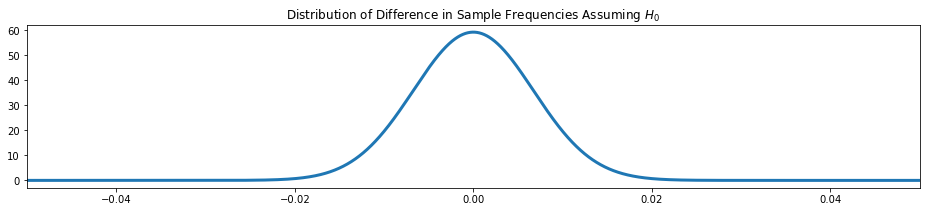

In [40]:
fig, ax = plt.subplots(1, figsize=(16, 3))

x = np.linspace(-.05, .05, num=10000)
ax.plot(x, difference_in_proportions.pdf(x), linewidth=3)
ax.set_xlim(-.05, .05)
ax.set_title("Distribution of Difference in Sample Frequencies Assuming $H_0$")

In [41]:
vet_sample_freq = 4334/6261
pop_sample_freq = 23283/45861
difference_in_sample_proportions = vet_sample_freq - pop_sample_freq
print(difference_in_sample_proportions)

0.18453542044669524


In [42]:
p_value = 1 - difference_in_proportions.cdf(difference_in_sample_proportions)
print(p_value)

0.0


Text(0.5, 1.0, 'p-value Reigon')

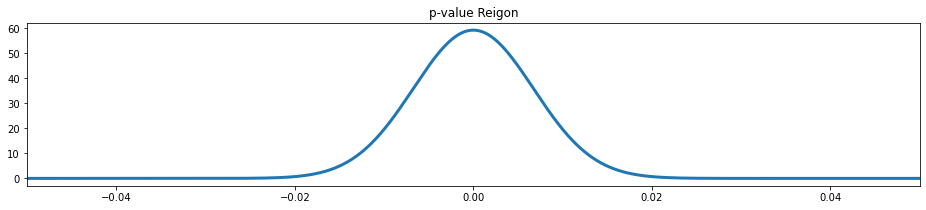

In [32]:
fig, ax = plt.subplots(1, figsize=(16, 3))

x = np.linspace(-.05, .05, num=10000)
ax.plot(x, difference_in_proportions.pdf(x), linewidth=3)
ax.fill_between(x, difference_in_proportions.pdf(x), where=(x >= difference_in_sample_proportions),
                color="red", alpha=0.5)
ax.set_xlim(-.05, .05)
ax.set_title("p-value Reigon")

Testing with median year

In [35]:
df_2010 = df_method[df_method['Year'] == 2010]

In [36]:
df_2010 = df_2010[df_2010['State of Death'] == 'All']

In [37]:
df_2019.head(10)

,Year,State of Death,Group Method,Method,Suicides
1792,2019,All,Veteran Method,Firearms,406
1799,2019,All,Veteran Method,Firearms,902
1810,2019,All,Veteran Method,Firearms,1939
1826,2019,All,Veteran Method,Firearms,1087
1838,2019,All,General Population Method,Firearms,2174
1848,2019,All,General Population Method,Firearms,4990
1861,2019,All,General Population Method,Firearms,10484
1879,2019,All,General Population Method,Firearms,5635


In [38]:
df_2010.groupby('Group Method').sum()

,Year,Suicides
Group Method,,
General Population Method,8040,19015
Veteran Method,8040,4408


In [ ]:
shared_sample_freq = (4408 + 19015) / (6535+)
shared_sample_variance = 52122 * (shared_sample_freq * (1 - shared_sample_freq)) / (6261*45861)

difference_in_proportions = stats.norm(0, np.sqrt(shared_sample_variance))

In [ ]:
fig, ax = plt.subplots(1, figsize=(16, 3))

x = np.linspace(-.05, .05, num=10000)
ax.plot(x, difference_in_proportions.pdf(x), linewidth=3)
ax.set_xlim(-.05, .05)
ax.set_title("Distribution of Difference in Sample Frequencies Assuming $H_0$")

In [ ]:
vet_sample_freq = 4334/6261
pop_sample_freq = 23283/45861
difference_in_sample_proportions = vet_sample_freq - pop_sample_freq
print(difference_in_sample_proportions)

In [ ]:
p_value = 1 - difference_in_proportions.cdf(difference_in_sample_proportions)
print(p_value)

In [ ]:
fig, ax = plt.subplots(1, figsize=(16, 3))

x = np.linspace(-.05, .05, num=10000)
ax.plot(x, difference_in_proportions.pdf(x), linewidth=3)
ax.fill_between(x, difference_in_proportions.pdf(x), where=(x >= difference_in_sample_proportions),
                color="red", alpha=0.5)
ax.set_xlim(-.05, .05)
ax.set_title("p-value Reigon")